In [726]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix 

%config Completer.use_jedi = False



In [727]:
df= pd.read_excel(r"C:\Users\Homa\Documents\customer_retention_dataset.xlsx")

In [728]:
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [729]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [730]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [731]:
df=df.drop(["4 What is the Pin Code of where you shop online from?"],axis=1)

In [732]:
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Google chrome,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,Google chrome,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,Safari,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Safari,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,Opera,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,Google chrome,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,Google chrome,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,Google chrome,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [733]:
df.describe()


,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
count,269,269,269,269,269,269,269,269,269,269,...,269,269,269,269,269,269,269,269,269,269
unique,2,5,11,5,6,4,4,4,3,4,...,10,10,8,11,8,6,7,8,8,8
top,Female,31-40 years,Delhi,Above 4 years,Less than 10 times,Mobile internet,Smartphone,Others,Window/windows Mobile,Google chrome,...,Amazon.in,"Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Snapdeal.com,Paytm.com,Amazon.in,Amazon.in,Amazon.in,Amazon.in
freq,181,81,58,98,114,142,141,134,122,216,...,57,60,75,61,87,72,96,53,94,79


In [734]:
# OBSERVATION: 

#A survey has been conducted in which responses have been collected from 269 population and taken their review on online shopping
#to predict customer retension and the factor affecting succuss of online store(which is directly propertional to customer retension).
# There are 71 questions and as per the response of customer we need to analyse the importance of each factor.

In [735]:
df.dtypes

1Gender of respondent                                                    object
2 How old are you?                                                       object
3 Which city do you shop online from?                                    object
5 Since How Long You are Shopping Online ?                               object
6 How many times you have made an online purchase in the past 1 year?    object
                                                                          ...  
Longer delivery period                                                   object
Change in website/Application design                                     object
Frequent disruption when moving from one page to another                 object
Website is as efficient as before                                        object
Which of the Indian online retailer would you recommend to a friend?     object
Length: 70, dtype: object

In [736]:
df.shape

(269, 70)

In [737]:
# OBSERVATION
#There are 70 columns and 269 rows.

In [738]:
df.isna().sum()

1Gender of respondent                                                    0
2 How old are you?                                                       0
3 Which city do you shop online from?                                    0
5 Since How Long You are Shopping Online ?                               0
6 How many times you have made an online purchase in the past 1 year?    0
                                                                        ..
Longer delivery period                                                   0
Change in website/Application design                                     0
Frequent disruption when moving from one page to another                 0
Website is as efficient as before                                        0
Which of the Indian online retailer would you recommend to a friend?     0
Length: 70, dtype: int64

In [739]:
# OBSERVATION:
#Here we can see there is null value.

<AxesSubplot:xlabel='count', ylabel='Which of the Indian online retailer would you recommend to a friend?'>

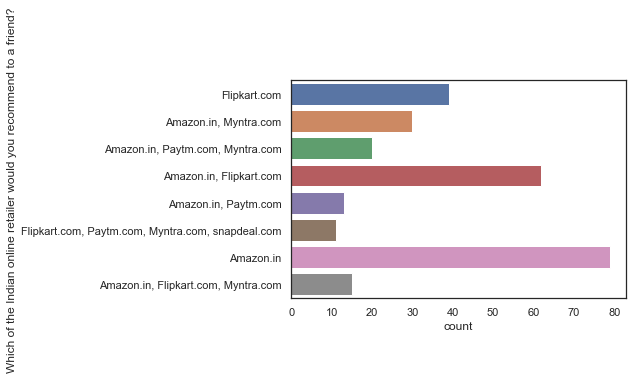

In [740]:
sns.countplot(y="Which of the Indian online retailer would you recommend to a friend?", data=df)


<AxesSubplot:xlabel='1Gender of respondent', ylabel='count'>

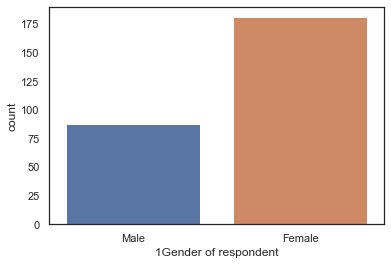

In [741]:
sns.countplot(x="1Gender of respondent", data=df)

In [742]:
# observation:
#Number of female is 175 and male is 94

In [743]:
#There are various satement which predict weither cx is satisfied or not with various features of particular online retail ploatform.
#I am taking value for money as my target data and others data as feature. Here I am going to use data graphs for better pictoral representation and check the coorelation of various features and target data.

<AxesSubplot:xlabel='count', ylabel='3 Which city do you shop online from?'>

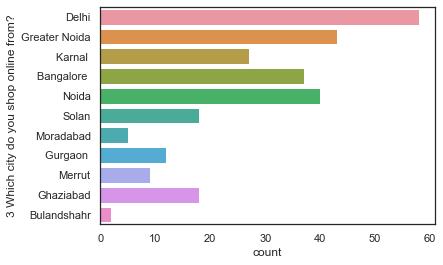

In [744]:
sns.countplot(y="3 Which city do you shop online from?", data=df)

<AxesSubplot:xlabel='count', ylabel='Which of the Indian online retailer would you recommend to a friend?'>

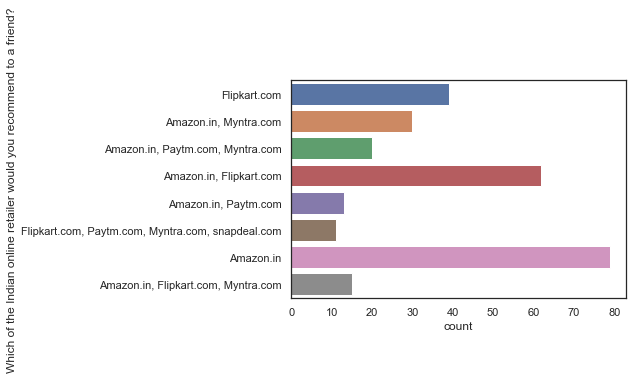

In [648]:
sns.countplot(y="Which of the Indian online retailer would you recommend to a friend?", data=df)

In [650]:
import warnings
warnings.filterwarnings('ignore')

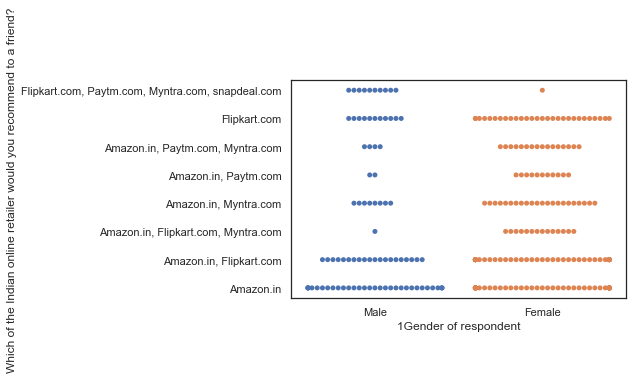

In [746]:
sns.swarmplot(x="1Gender of respondent",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

# OBSERVATION:There are more number of female respondant.

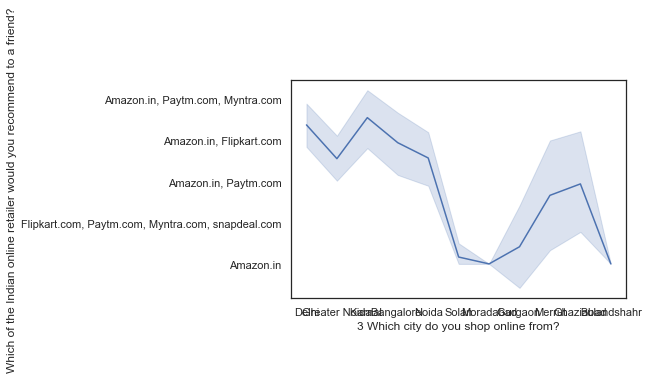

<Figure size 1080x720 with 0 Axes>

In [654]:
sns.lineplot(x="3 Which city do you shop online from?",y="Which of the Indian online retailer would you recommend to a friend?",data=df)

plt.figure(figsize = (15,10))

plt.show()
##  We can see the suvey has been conducted in 11 cities. And the most recommded Ecommerse platform Amazon.in and the lest recommended E commerse platform is Flipkart.com 
## Most of the respondent are from Delhi and least number of respondant is from Bulandshahr.Here we can see the coorelation between City and recommendation is not much. We are having more number respondant.
## Impact of city on cx recomendation is very less.

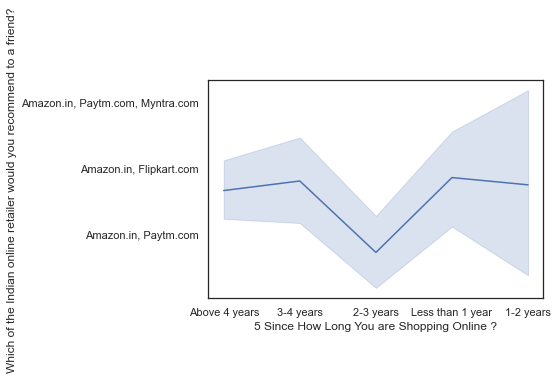

In [655]:
sns.lineplot(x="5 Since How Long You are Shopping Online ?",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

## Respondant who are doing online shoping for more than 4 years or less than one year are recommending Flipkart, Amazon.


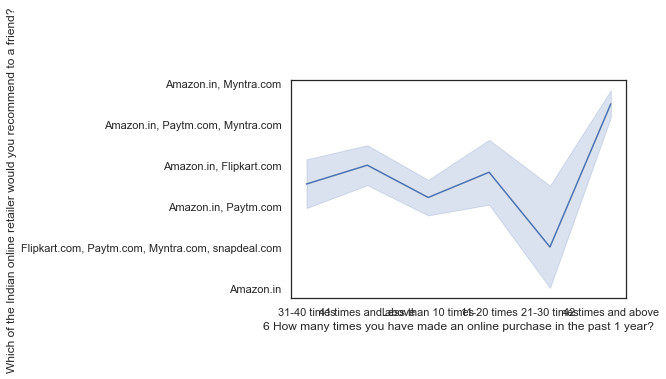

In [656]:
sns.lineplot(x="6 How many times you have made an online purchase in the past 1 year?",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

##  100+ of survey sample has done shoping less than 10 time and 60 of sample is 60 sample have done shopping for 31 to 40 time. Those who are shopping for less than 10 time in  year has reccommended Amazon.in anf flipkart.
## and same for those who have done shopping for more thn 31-40 times in a year.

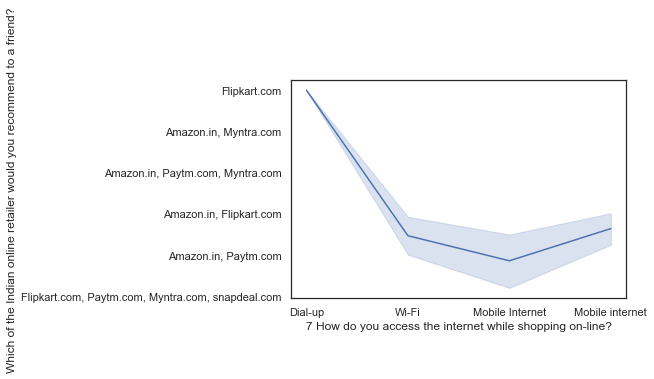

In [659]:
sns.lineplot(x="7 How do you access the internet while shopping on-line?",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

## Very few people are using Dial up, Most of the sample is using mobile internet for online shopping and some of them are using wi-fi.
## Most of the mobile internet users recommended Flipkart, Amazon.in,Paytm.com

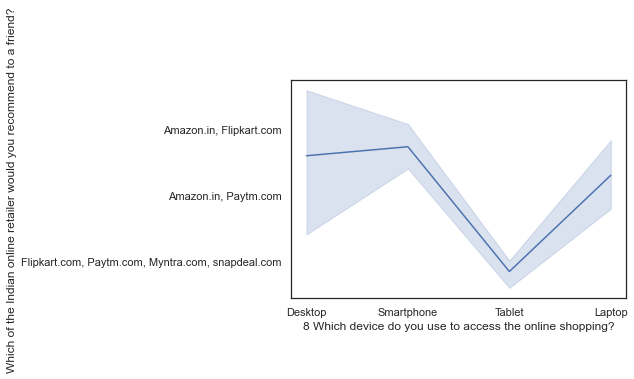

In [660]:
sns.lineplot(x="8 Which device do you use to access the online shopping?",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

## Desktop and smartphone  user recommended Amazon.in, Flipkart.com, Tablet users recommended Flipkart.com, Paytm.com, Myntra.com,snapdea.com, Laptop user recommended Amazon and Paytm.com.

<AxesSubplot:xlabel='count', ylabel='8 Which device do you use to access the online shopping?'>

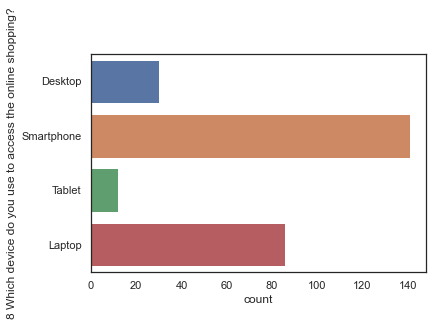

In [355]:
sns.countplot(y="8 Which device do you use to access the online shopping?", data=df)

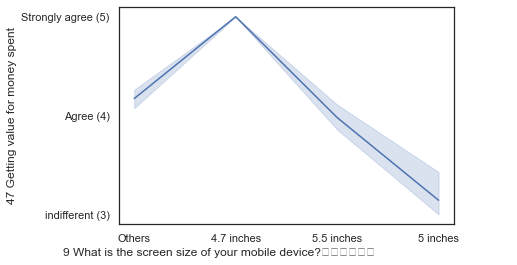

In [661]:
sns.lineplot(x="9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ",y="47 Getting value for money spent",data=df)
plt.show()

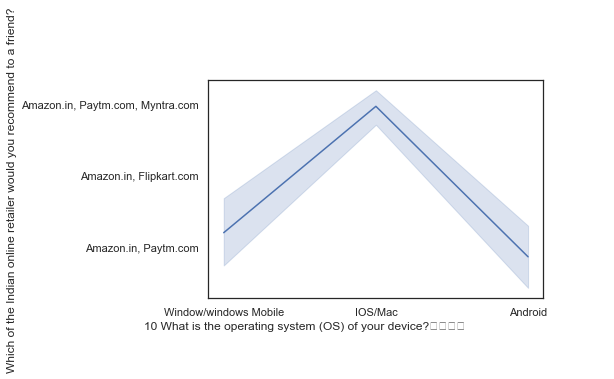

In [662]:
sns.lineplot(x="10 What is the operating system (OS) of your device?\t\t\t\t                                          ",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

## Window user and Android user recommended Amazon.in and Paytm.com,IOS users recommended Amazon, Paytm, Myntra.

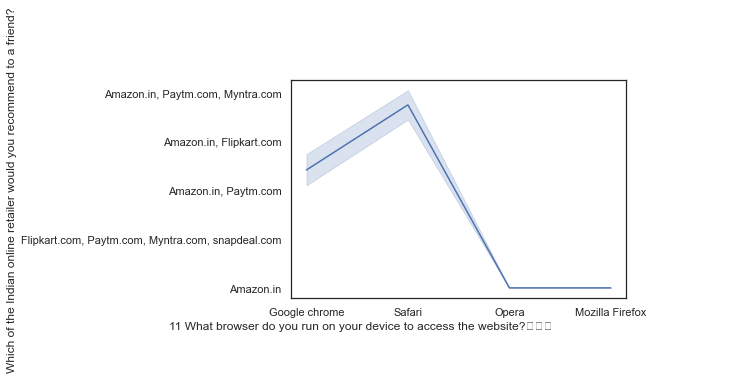

In [664]:
sns.lineplot(x="11 What browser do you run on your device to access the website?\t\t\t                                                          ",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

## Most of Google chrome user recommended Amazon, Paytm, Flipkart and safari users recommended Amazon.in, paytm And Myntra, Opera and Mozilla Firefox user recoomended Amazon.in 

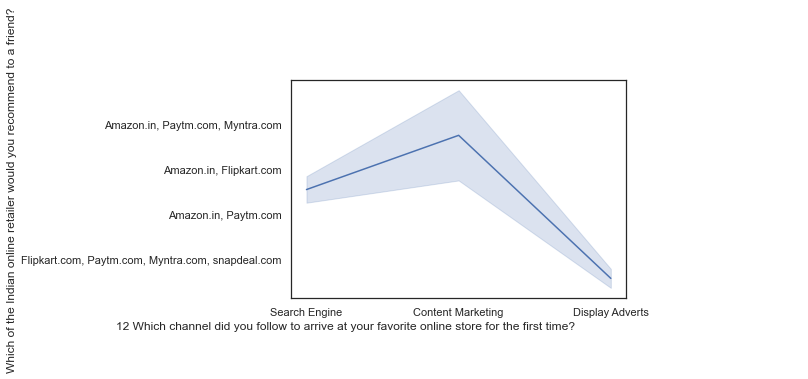

In [665]:
sns.lineplot(x="12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

## Search Engine user recommended Amazon.in, Paytm.com, Flipkart. Those are buying products through content marketing mostly recommended and Myntra. 

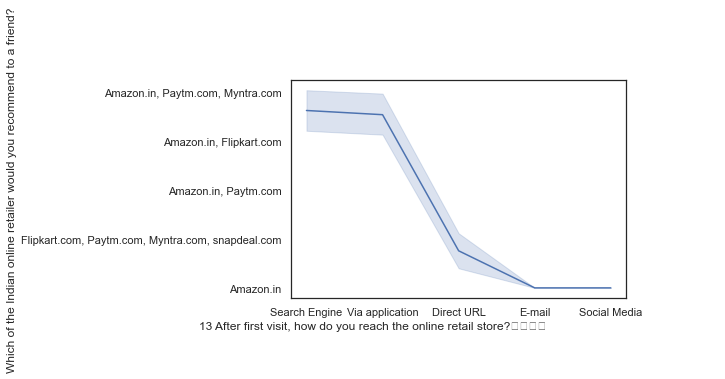

In [666]:
sns.lineplot(x="13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

## Search engine users recommended Amazon, myntra,paytm and flipkart While those who buy online via application uses all of the E commerse plarform, buyer who buy directly from url recommended Flipkart, paytm, myntra and snapdeal.com  

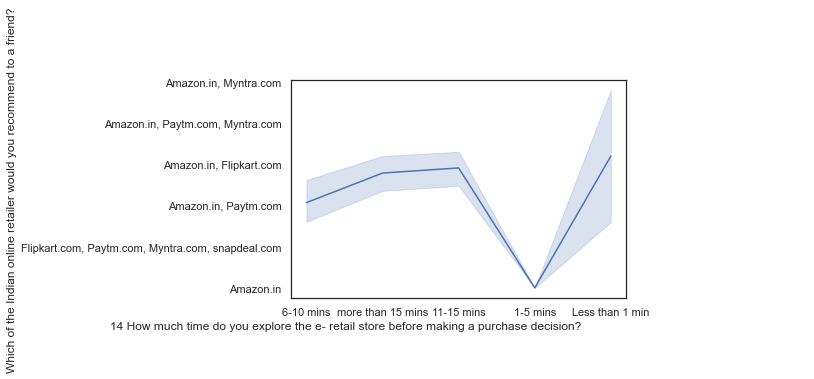

In [667]:
sns.lineplot(x="14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()
## Those who are spending less time are using Amazon.in, while those who are not willing to spend even  single min are either buying from Amazon.in or Flipkart. And those Who are investing more than 15 min Amazon, Flipkart, Paytm.

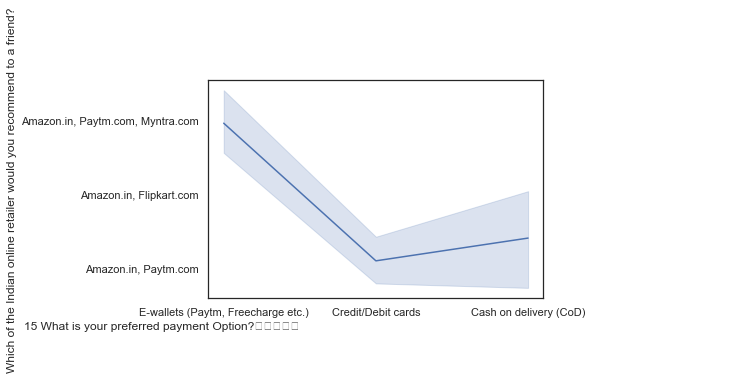

In [668]:
sns.lineplot(x="15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

## Most of the E-Wallets(Paytm, Freecharge) are recommending Amazon.in,Paytm.com, Myntra.Mostly Cx are recommending Amazon and Paytm.

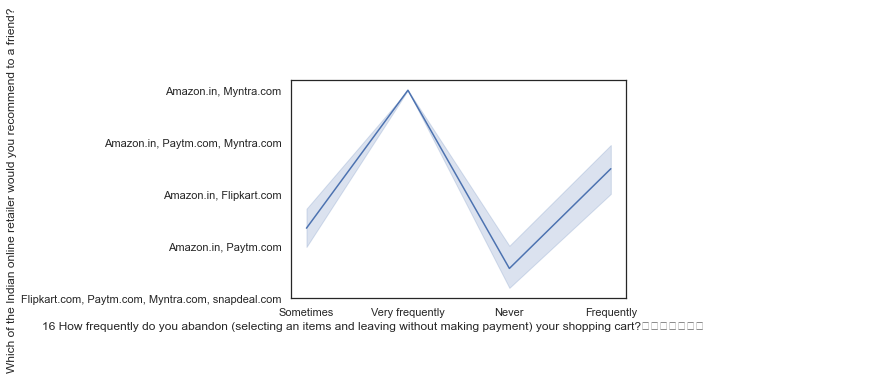

In [669]:
sns.lineplot(x="16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

## Amazon and Myntra are the most frequently do you abandon (selecting an items and leaving without making payment) while Flipkart.com, Paytm.com are never abandoned e commerce platform.

In [671]:


## 

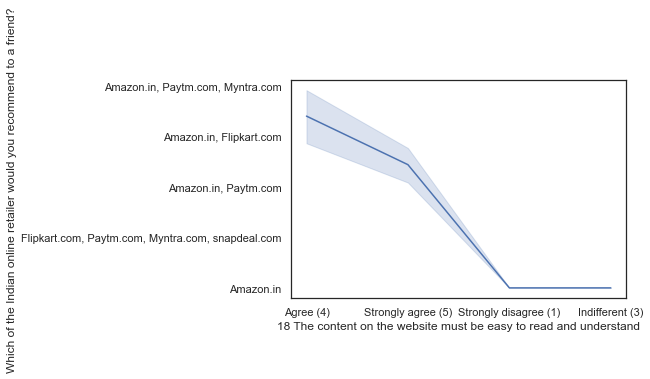

In [688]:
sns.lineplot(x="18 The content on the website must be easy to read and understand",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

## Those who suggested content on the website must be easy to read and understand recommende Amazon, Flipkart, and Paytm.com. I shows Content of website is important for customer reliability.

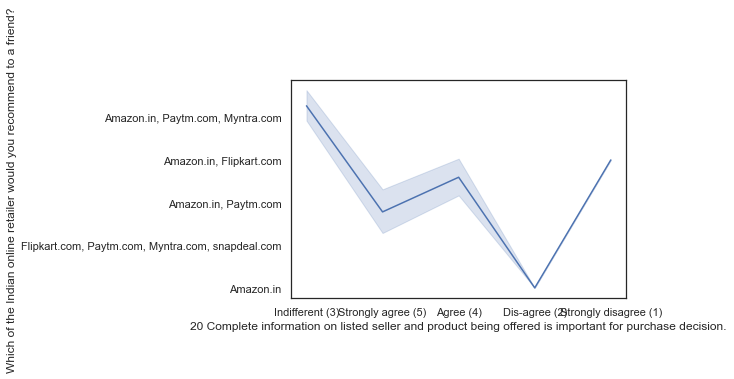

In [691]:
sns.lineplot(x="20 Complete information on listed seller and product being offered is important for purchase decision.",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

## Those who are strongly agrreing importance of complete imformation on listed product is important for decision making are recommending Amazon and Paytm.

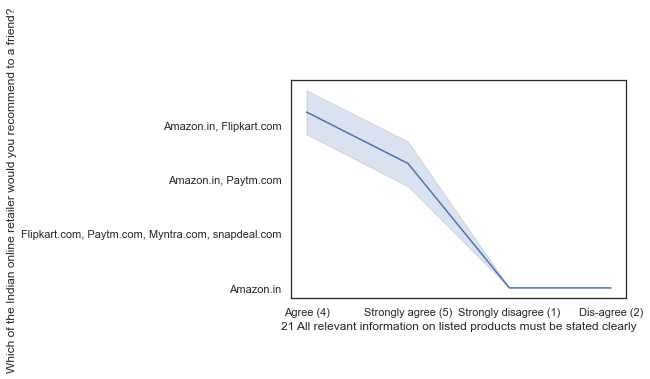

In [692]:
sns.lineplot(x="21 All relevant information on listed products must be stated clearly",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

## Those who are strongly agreeing that all relevant information on listed product must be stated clearly are recoomending Amazon and Paytm.


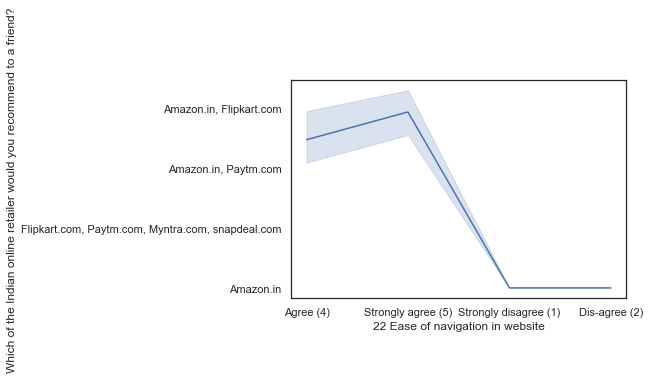

In [694]:
sns.lineplot(x="22 Ease of navigation in website",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

## Most of those who are agreeing or strongly agreeing with te fact that Ease of navigation in website is important factor has recommended Amazon , Flipkart and Paytm. 

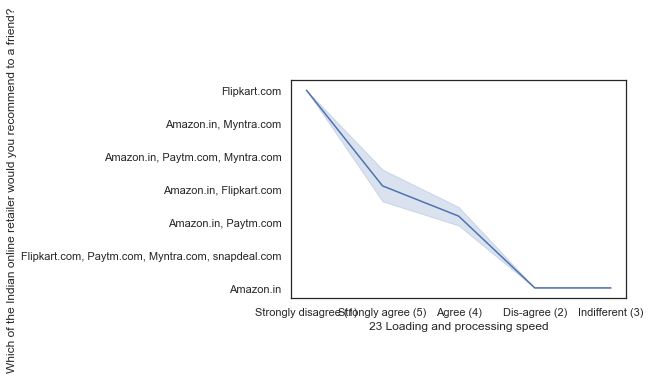

In [695]:
sns.lineplot(x="23 Loading and processing speed",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()
## Loading and process speed is important are strongly agreed by those who are recommending Amzon and flipkart.

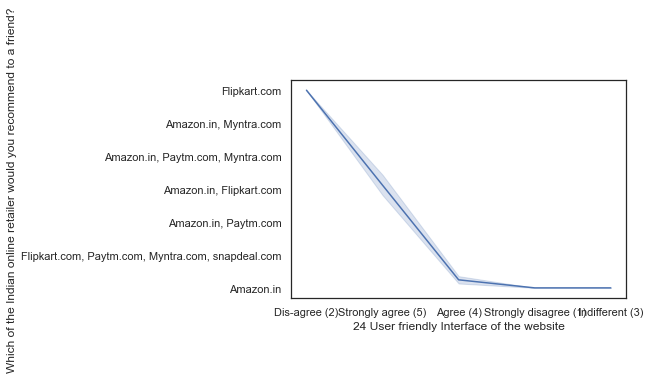

In [696]:
sns.lineplot(x="24 User friendly Interface of the website",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

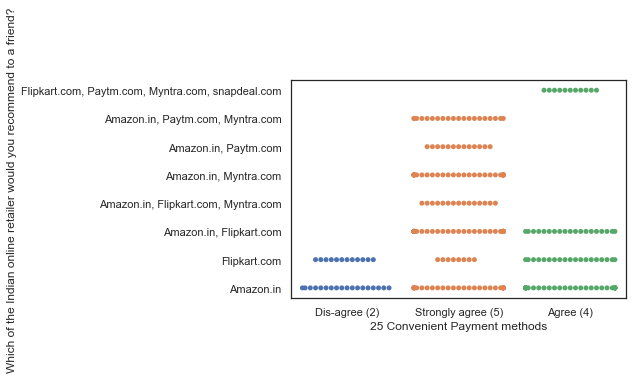

In [372]:
sns.swarmplot(x="25 Convenient Payment methods",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

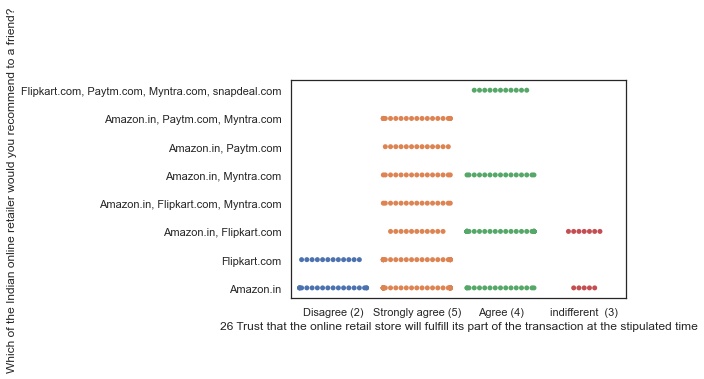

In [373]:
sns.swarmplot(x="26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

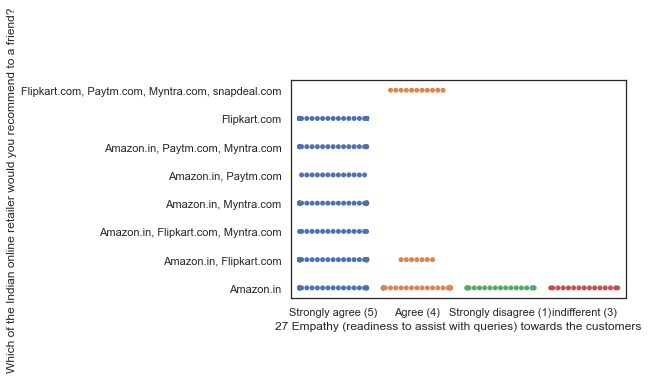

In [374]:
sns.swarmplot(x="27 Empathy (readiness to assist with queries) towards the customers",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

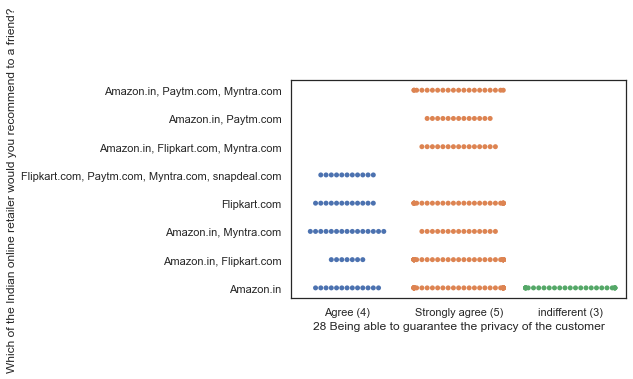

In [375]:
sns.swarmplot(x="28 Being able to guarantee the privacy of the customer",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

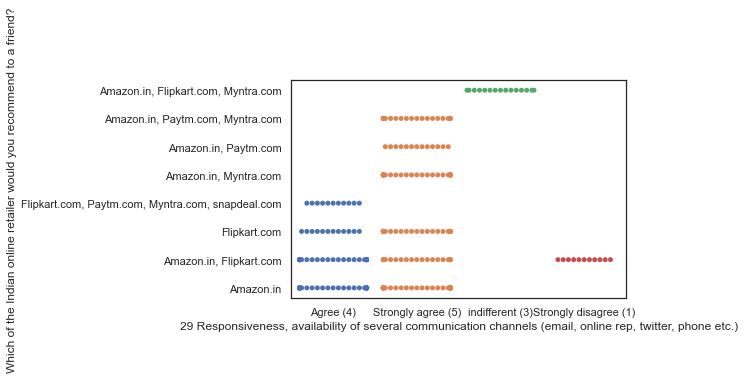

In [376]:
sns.swarmplot(x="29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

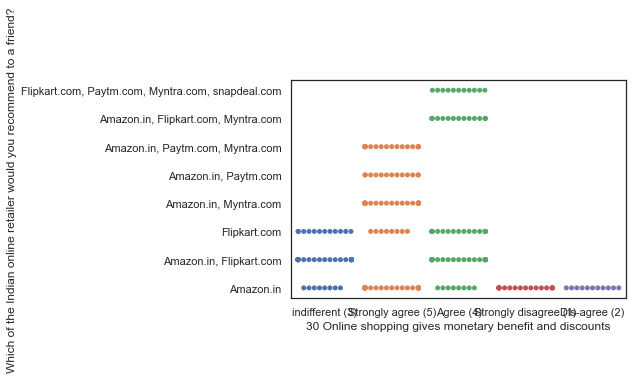

In [377]:
sns.swarmplot(x="30 Online shopping gives monetary benefit and discounts",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

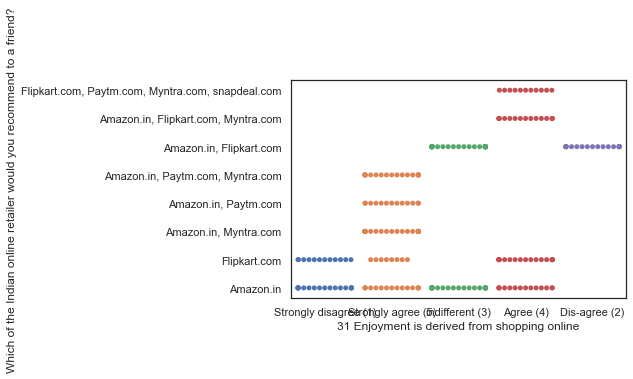

In [378]:
sns.swarmplot(x="31 Enjoyment is derived from shopping online",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

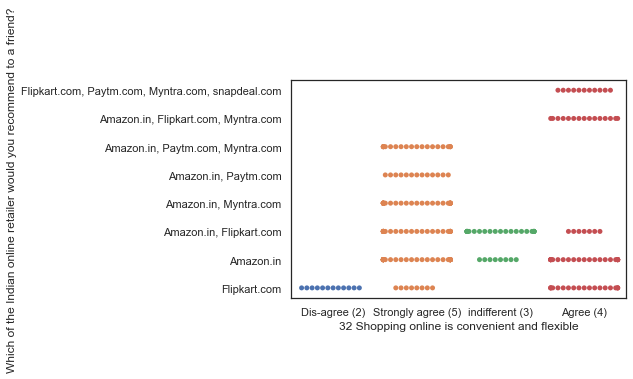

In [379]:
sns.swarmplot(x="32 Shopping online is convenient and flexible",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

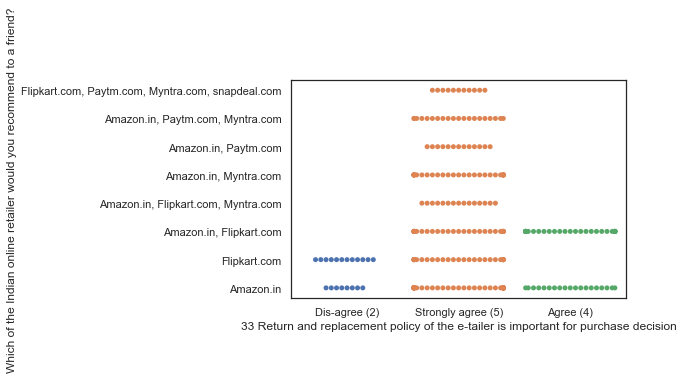

In [380]:
sns.swarmplot(x="33 Return and replacement policy of the e-tailer is important for purchase decision",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

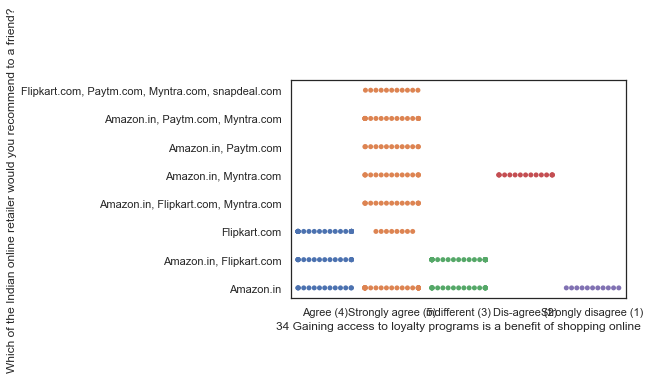

In [381]:
sns.swarmplot(x="34 Gaining access to loyalty programs is a benefit of shopping online",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

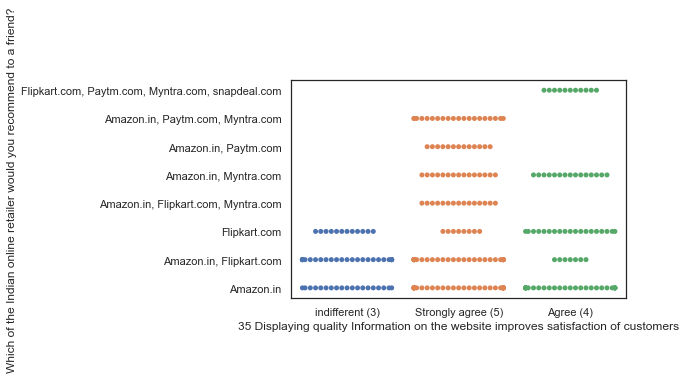

In [382]:
sns.swarmplot(x="35 Displaying quality Information on the website improves satisfaction of customers",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

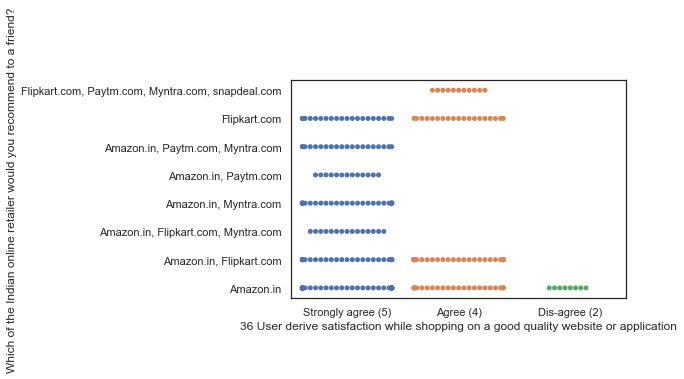

In [383]:
sns.swarmplot(x="36 User derive satisfaction while shopping on a good quality website or application",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

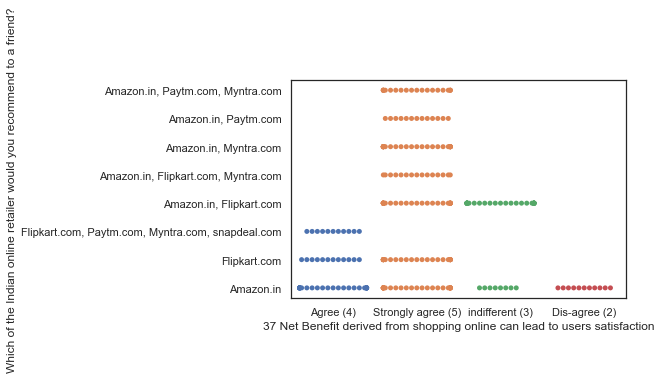

In [384]:
sns.swarmplot(x="37 Net Benefit derived from shopping online can lead to users satisfaction",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

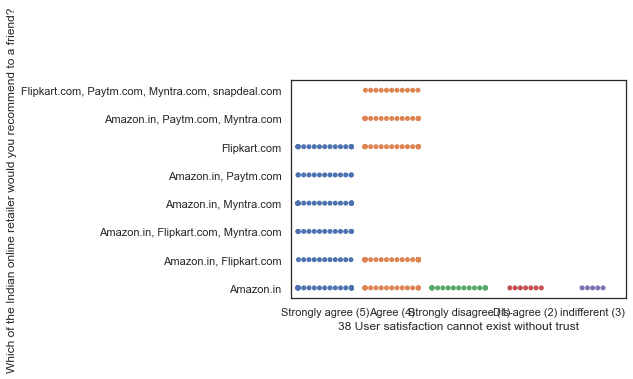

In [385]:
sns.swarmplot(x="38 User satisfaction cannot exist without trust",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

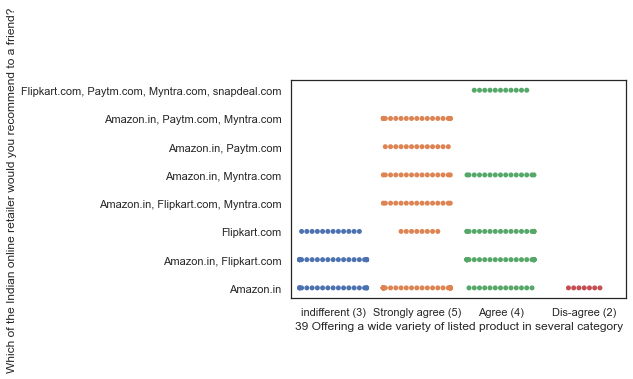

In [386]:
sns.swarmplot(x="39 Offering a wide variety of listed product in several category",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

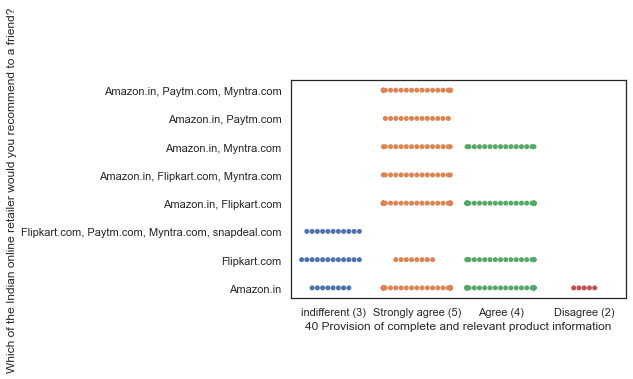

In [387]:
sns.swarmplot(x="40 Provision of complete and relevant product information",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

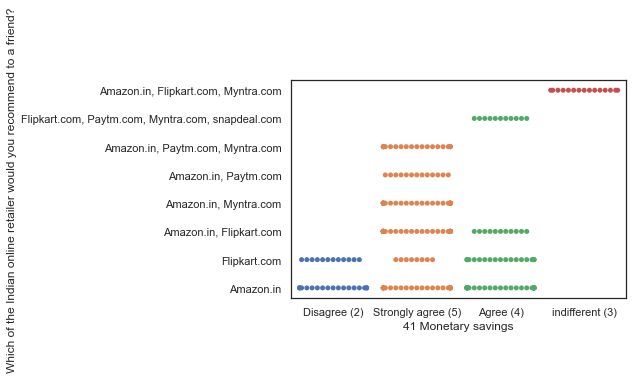

In [388]:
sns.swarmplot(x="41 Monetary savings",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

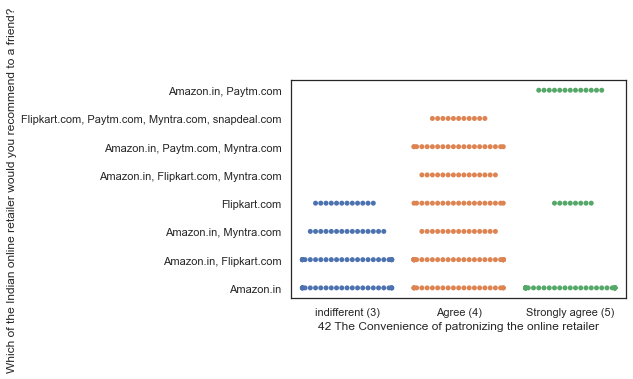

In [389]:
sns.swarmplot(x="42 The Convenience of patronizing the online retailer",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

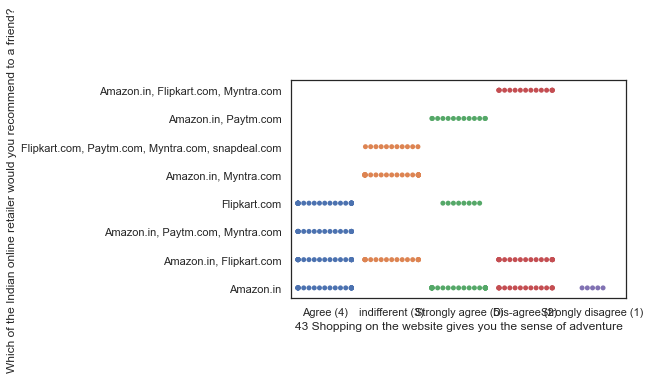

In [390]:
sns.swarmplot(x="43 Shopping on the website gives you the sense of adventure",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

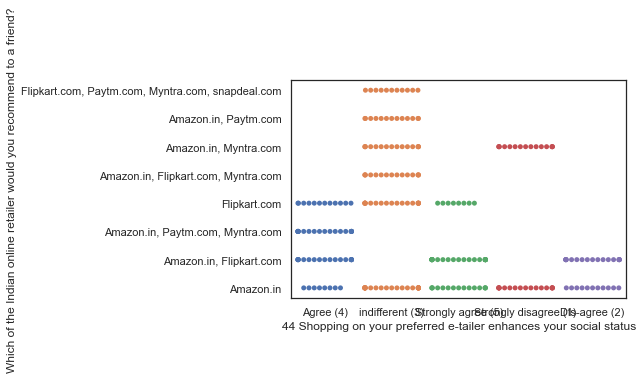

In [391]:
sns.swarmplot(x="44 Shopping on your preferred e-tailer enhances your social status",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

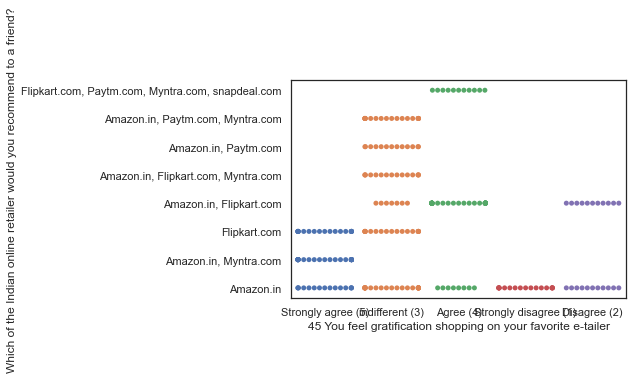

In [392]:
sns.swarmplot(x="45 You feel gratification shopping on your favorite e-tailer",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

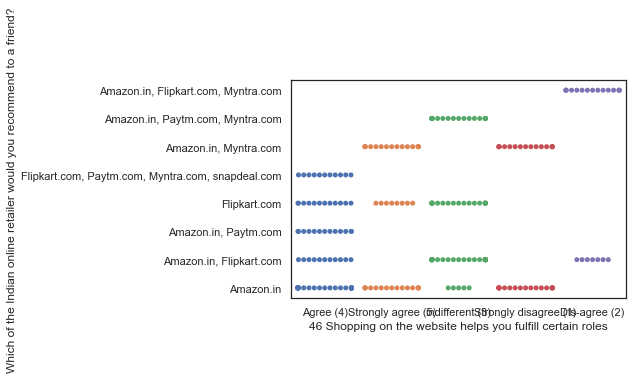

In [393]:
sns.swarmplot(x="46 Shopping on the website helps you fulfill certain roles",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

In [697]:
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()

In [698]:
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [699]:
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,1.0,1.0,2.0,3.0,2.0,0.0,0.0,3.0,2.0,0.0,...,0.0,0.0,3.0,5.0,0.0,3.0,2.0,0.0,0.0,6.0
1,0.0,0.0,2.0,3.0,3.0,3.0,2.0,0.0,1.0,0.0,...,1.0,6.0,7.0,10.0,7.0,5.0,0.0,4.0,1.0,3.0
2,0.0,0.0,4.0,2.0,3.0,1.0,2.0,2.0,0.0,0.0,...,7.0,6.0,4.0,7.0,0.0,3.0,5.0,6.0,0.0,5.0
3,1.0,0.0,6.0,2.0,5.0,1.0,2.0,2.0,1.0,3.0,...,9.0,7.0,4.0,8.0,5.0,3.0,1.0,1.0,2.0,1.0
4,0.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,1.0,3.0,...,5.0,8.0,5.0,8.0,7.0,3.0,0.0,7.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0.0,0.0,10.0,0.0,5.0,1.0,2.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265,0.0,1.0,3.0,0.0,2.0,1.0,2.0,3.0,0.0,0.0,...,4.0,4.0,3.0,5.0,3.0,1.0,2.0,2.0,4.0,6.0
266,0.0,2.0,0.0,1.0,5.0,2.0,1.0,3.0,2.0,0.0,...,0.0,9.0,0.0,10.0,7.0,5.0,6.0,7.0,0.0,0.0
267,0.0,4.0,10.0,1.0,5.0,3.0,2.0,2.0,0.0,0.0,...,0.0,2.0,0.0,4.0,0.0,0.0,0.0,5.0,5.0,0.0


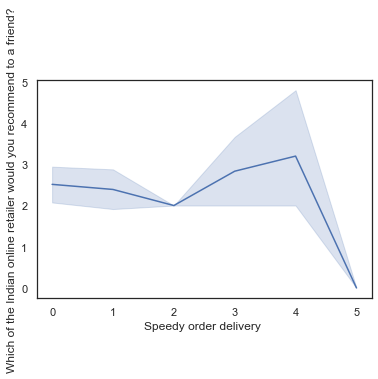

In [700]:
sns.lineplot(x="Speedy order delivery ",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

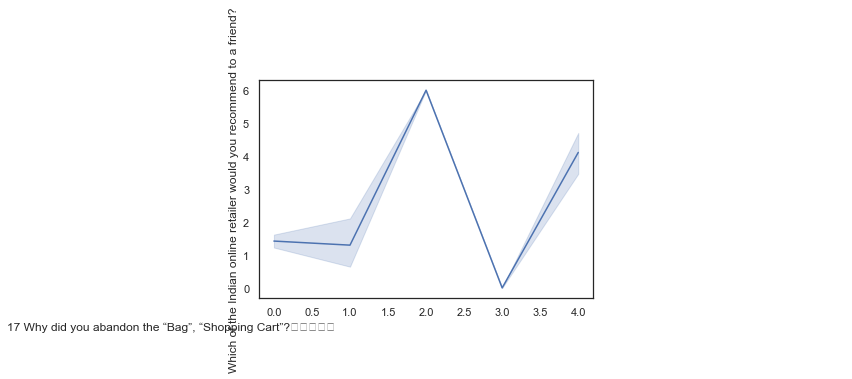

In [701]:
sns.lineplot(x="17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

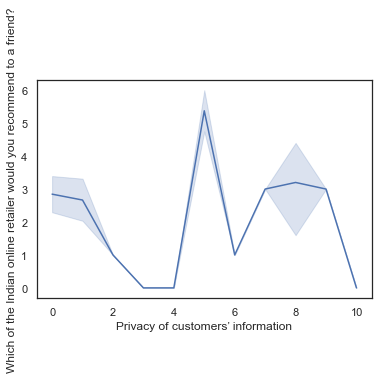

In [702]:
sns.lineplot(x="Privacy of customers’ information",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

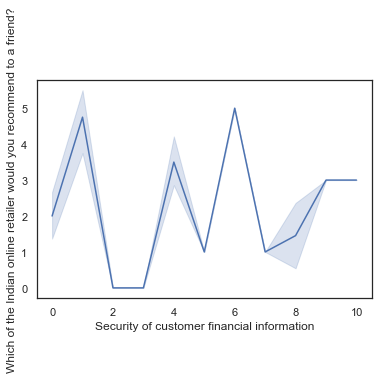

In [703]:
sns.lineplot(x="Security of customer financial information",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

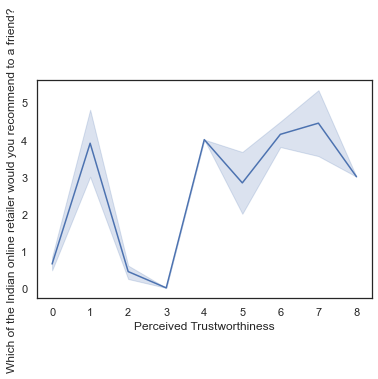

In [704]:
sns.lineplot(x="Perceived Trustworthiness",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

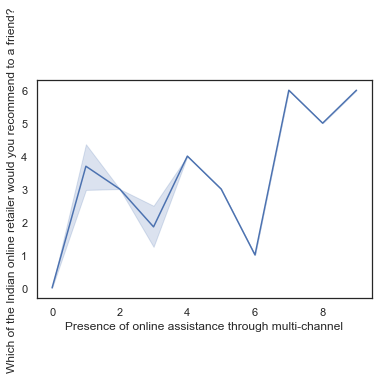

In [705]:
sns.lineplot(x="Presence of online assistance through multi-channel",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

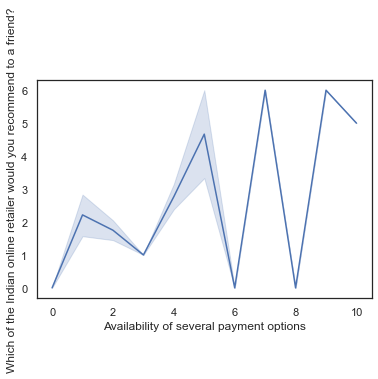

In [706]:
sns.lineplot(x="Availability of several payment options",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

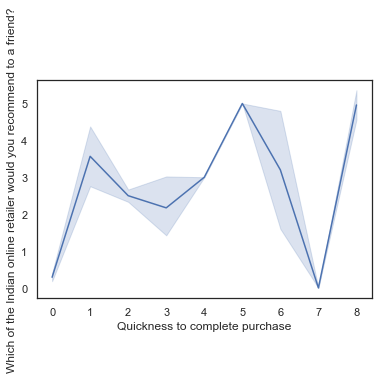

In [707]:
sns.lineplot(x="Quickness to complete purchase",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

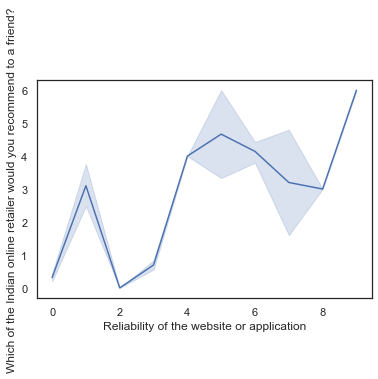

In [708]:
sns.lineplot(x="Reliability of the website or application",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

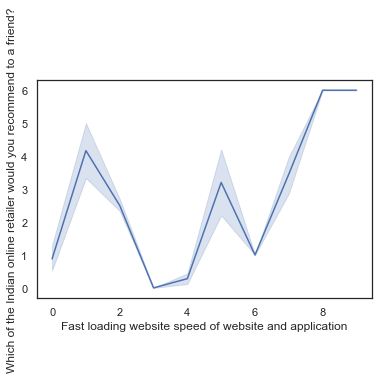

In [709]:
sns.lineplot(x="Fast loading website speed of website and application",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

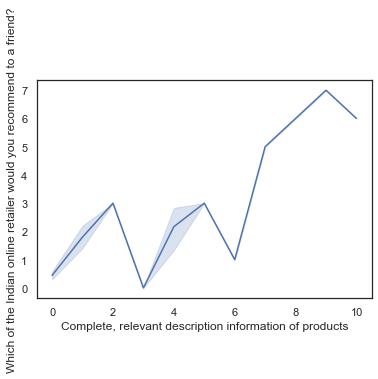

In [710]:
sns.lineplot(x="Complete, relevant description information of products",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

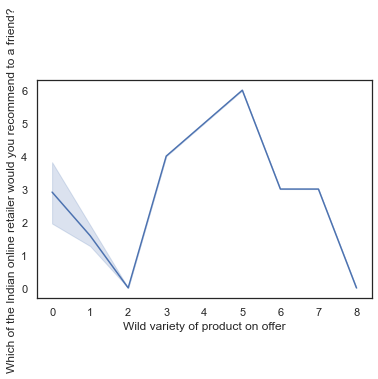

In [711]:
sns.lineplot(x="Wild variety of product on offer",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

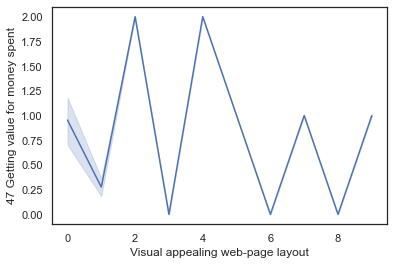

In [712]:
sns.lineplot(x="Visual appealing web-page layout",y="47 Getting value for money spent",data=df)
plt.show()

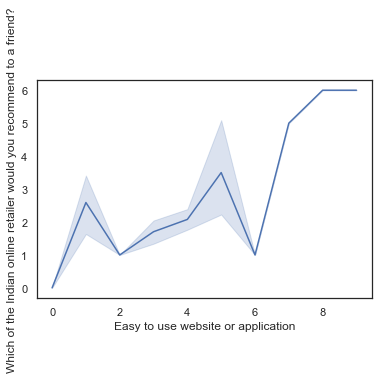

In [713]:
sns.lineplot(x="Easy to use website or application",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

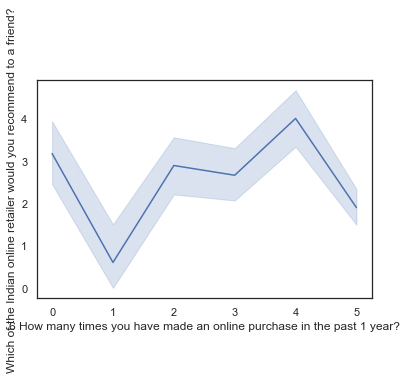

In [714]:
sns.lineplot(x="6 How many times you have made an online purchase in the past 1 year?",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

##  100 of survey sample has done shoping less than 10 time and 60 of sample is 60 sample have done shopping for 31 to 40 time. Those who are shopping for less than 10 time in  year has reccommended Amazon.in anf flipkart.
## and same for those who have done shopping for more thn 31-40 times in a year.

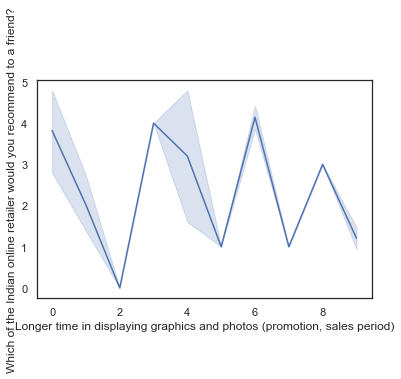

In [715]:
sns.lineplot(x="Longer time in displaying graphics and photos (promotion, sales period)",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

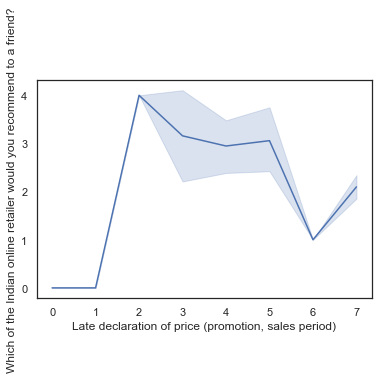

In [716]:
sns.lineplot(x="Late declaration of price (promotion, sales period)",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

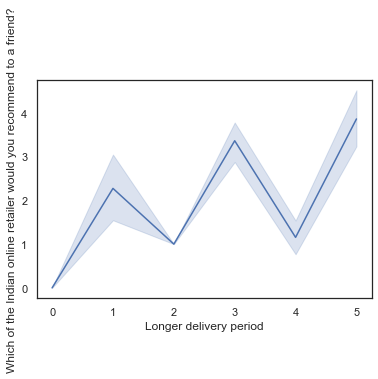

In [717]:
sns.lineplot(x="Longer delivery period",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

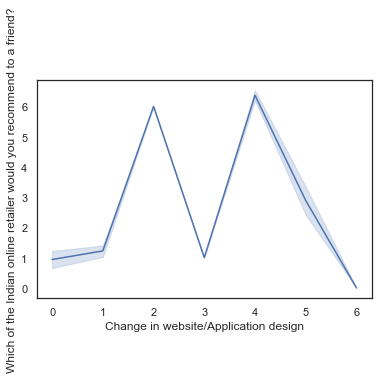

In [718]:
sns.lineplot(x="Change in website/Application design",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

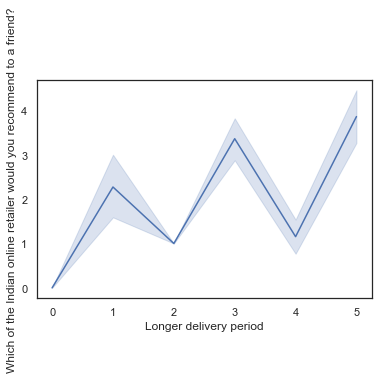

In [719]:
sns.lineplot(x="Longer delivery period",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()


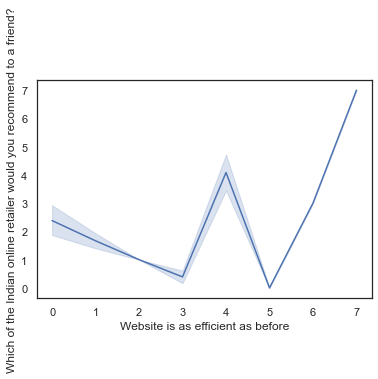

In [720]:
sns.lineplot(x="Website is as efficient as before",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()

#

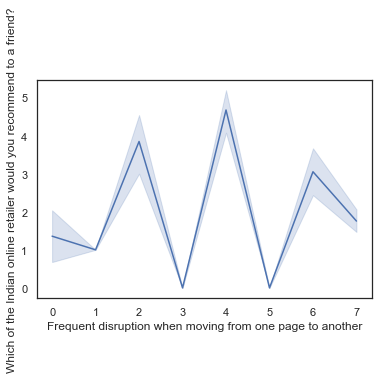

In [721]:
sns.lineplot(x="Frequent disruption when moving from one page to another",y="Which of the Indian online retailer would you recommend to a friend?",data=df)
plt.show()
 ##Longer delivery period is highly correlated to recommendation of online retailer.

In [722]:
print('Another view of correlations among features:\n')
df.corr().style.background_gradient(cmap="coolwarm")

Another view of correlations among features:



,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,11 What browser do you run on your device to access the website?,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?,"17 Why did you abandon the “Bag”, “Shopping Cart”?",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
1Gender of respondent,1.000000,0.046169,0.080912,-0.057096,0.077876,-0.309029,0.061673,0.

In [723]:
## To understand importance of each feature we need to undestand correlation of different with target variable. Here I am taking"Which of the Indian online retailer would you recommend to a friend?" as my taget Variable
#becuse recommendation means cx has trust on particular online retailer and he mostly buy product pro whose retail shop
print('Correlation of different features of our dataset with Which of the Indian online retailer would you recommend to a friend?:')
for i in df.columns:
  corr, _ = pearsonr(df[i], df['Which of the Indian online retailer would you recommend to a friend?'])
  print('%s : %.4f' %(i,corr))

Correlation of different features of our dataset with Which of the Indian online retailer would you recommend to a friend?:
1Gender of respondent : -0.0034
2 How old are you?  : -0.1353
3 Which city do you shop online from? : -0.1421
5 Since How Long You are Shopping Online ? : 0.1361
6 How many times you have made an online purchase in the past 1 year? : -0.1520
7 How do you access the internet while shopping on-line? : 0.0411
8 Which device do you use to access the online shopping? : 0.0994
9 What is the screen size of your mobile device?						                                         : 0.0745
10 What is the operating system (OS) of your device?				                                           : -0.1596
11 What browser do you run on your device to access the website?			                                                           : -0.1842
12 Which channel did you follow to arrive at your favorite online store for the first time?                                                              

In [724]:
#OBSERVATION: 
## We can see corelation of different factors with customer retension. Here is some important feature which is correlated to customer retension.
##Some of the most important factor for cx satisfaction are given below on the basis of their relevance in descending order.
#1- Complete, relevant description information of products : 0.6809

#- Reliability of the website or application : 0.5427

#3- Easy to use website or application : 0.5417

#4- Presence of online assistance through multi-channel : 0.5038

#5- Perceived Trustworthiness : 0.4835

#6- 17 Why did you abandon the “Bag”, “Shopping Cart”: 0.4490

#7- 31 Enjoyment is derived from shopping online : -0.4366

#8- Longer delivery period : 0.4284

#9- Change in website/Application design : 0.4239

#10- Availability of several payment options : 0.4167

#11- 34 Gaining access to loyalty programs is a benefit of shopping online : -0.4006

#12- Quickness to complete purchase : 0.3988

#13- 21 All relevant information on listed products must be stated clearly : -0.3629

#14- 28 Being able to guarantee the privacy of the customer : -0.3587

#15- 18 The content on the website must be easy to read and understand : -0.3490

#16- Fast loading website speed of website and application : 0.3352

#17- Visual appealing web-page layout : 0.3161

#18- 33 Return and replacement policy of the e-tailer is important for purchase decision : 0.3116

#19- 15 What is your preferred payment Option? : 0.3085

#20- Loading and processing speed : 0.2981


In [725]:

print("*******************-------------------END OF PROJECT------------------********************")
print("                           ***********THANKS*************                 ")

*******************-------------------END OF PROJECT------------------********************
                           ***********THANKS*************                 
